### Importing Libraries to load data

In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt

## **Loading the data**

In [2]:
df=pd.read_csv(r"Multiple CSV/3.concertriccir2.csv",header=None) 
df.head() 

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [4]:
# Checking whether target variable is balanced or not
df[2].value_counts()  

2
0.0    250
1.0    250
Name: count, dtype: int64

**Observation:**
- Target variable is balanced data with 50% data as 1's and 50% data as 0's.

## **Identifying Input and Output Features**

In [5]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int) 

## **Spliting the data into train and test** 

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

### Standardizing input features 

In [105]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

### **Building the Logical Structure**

In [106]:
from keras import Sequential 
from keras.layers import Dense,Dropout,BatchNormalization

from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD 

In [119]:
model=Sequential()
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dense(10,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid"))  

In [120]:
model.summary() 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 20)                60        
                                                                 
 dense_35 (Dense)            (None, 16)                336       
                                                                 
 batch_normalization_6 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_36 (Dense)            (None, 10)                170       
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 32 (128.00 Byte)
_____________________

### compiling the model 

In [121]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=15,epochs=30,validation_split=0.15)  

Epoch 1/30
25/25 [==============================] - 1s 11ms/step - loss: 0.7189 - accuracy: 0.5346 - val_loss: 0.7117 - val_accuracy: 0.8125
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6704 - accuracy: 0.6343 - val_loss: 0.7089 - val_accuracy: 0.7656
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6648 - val_loss: 0.7018 - val_accuracy: 0.8125
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6343 - accuracy: 0.6787 - val_loss: 0.6965 - val_accuracy: 0.7656
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6248 - accuracy: 0.7036 - val_loss: 0.6904 - val_accuracy: 0.7500
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6057 - accuracy: 0.7507 - val_loss: 0.6800 - val_accuracy: 0.7812
Epoch 7/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6045 - accuracy: 0.7729 - val_loss: 0.6806 - val_accuracy: 0.8125
Epoch 8/30
25/25 [=

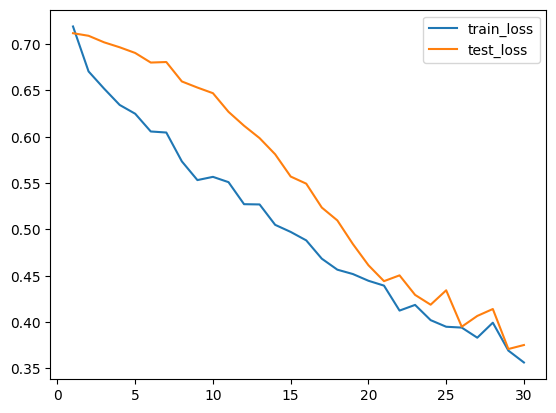

In [122]:
plt.plot(range(1,31),history.history["loss"],label="train_loss")
plt.plot(range(1,31),history.history["val_loss"],label="test_loss") 
plt.legend() 

## Predicting the model 

In [123]:
predicted=model.predict(x_test)  

3/3 [==============================] - 0s 3ms/step


In [124]:
predicted=np.where(predicted>0.5,1,0) 

## Evaluating the model 

In [125]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted)) 

0.7866666666666666


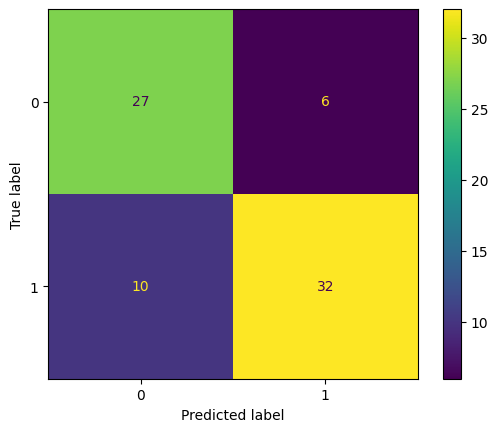

In [126]:
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

## PLOTING THE DECISION SURFACE 

In [91]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

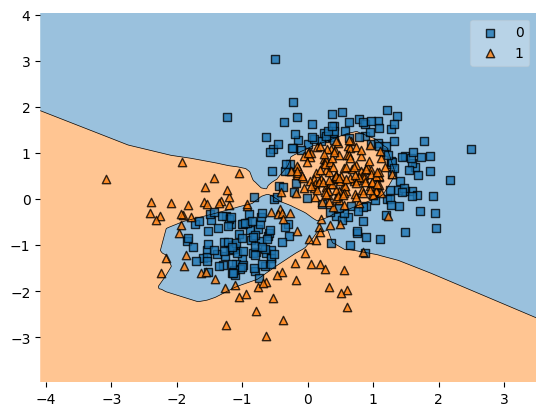

In [127]:
plot_decision_regions(x_train,y_train.values,clf=model)  

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

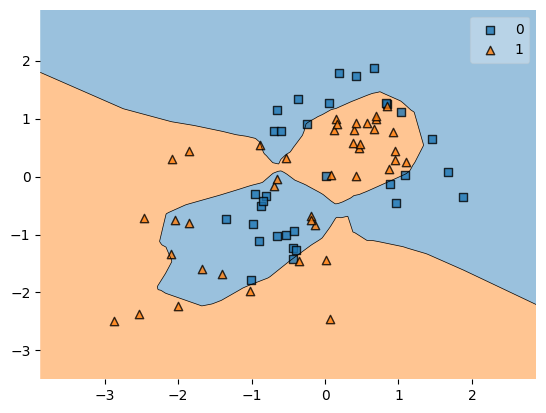

In [128]:
plot_decision_regions(x_test,y_test.values,clf=model) 

## **Conclusions:**

###### This neural network model achieves an accuracy of 78%. The model architecture consists of 3 hidden layers with the following specifications:

- In the first hidden layer, there are 20 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.
- In the second hidden layer, there are 16 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.
- In the third hidden layer, there are 10 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.

- The output layer uses the sigmoid activation function.

#### In model compilation, 

- Loss function is Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 30 epochs.
 
#### Overall, this neural network model architecture and training configuration achieve an accuracy of 78%. 